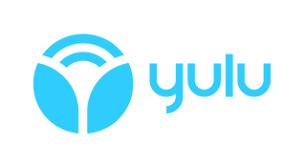

# **1. Importing Python Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import scipy.stats as stats

# **2. Importing the Dataset**

In [9]:
yulu_df = pd.read_csv('bike_sharing.csv')

### **2.1 Analysing first few rows**

In [11]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### **2.2 Finding out Shape and Dimensonality of DataFrame**

In [13]:
yulu_df.shape

(10886, 12)

In [14]:
yulu_df.ndim

2

### **2.3 Extracting Datatype of all columns**

In [16]:
yulu_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### **2.4 Extracting Dataset's information**

In [18]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### **2.5 Checking for Null Values**

In [20]:
yulu_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are `10,886` rows in this dataset. As you can see, there are no null values in this dataset which implies that the process of data collection was carried out very smoothly.

### **2.6 Check for Duplicates**

In [23]:
yulu_df.duplicated().sum()

0

There are no duplicate values in this dataset. Therefore, no imputation is required.

### **2.7 Updating few columns for better analysis and insights**

In [26]:
yulu_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### **2.7.1 Adding separate columns for 'date', 'time' and 'year'**

In [28]:
yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

# Adding 'year' column
yulu_df['year'] = yulu_df['datetime'].dt.year

# Adding 'time' column
yulu_df['time'] = yulu_df['datetime'].dt.time

# Adding 'date' column
yulu_df['date'] = yulu_df['datetime'].dt.date

# Dropping 'datetime' column
yulu_df.drop('datetime', axis = 1, inplace = True)

#### **2.7.2 Updating 'season' column**

In [30]:
# 1: Spring
# 2: Summer
# 3: Fall
# 4: Winter

yulu_df['season'] = yulu_df['season'].apply(lambda x : 'spring' if x == 1 else 'summer' if x == 2 else 'fall' if x == 3 else 'winter')

In [31]:
yulu_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,time,date
0,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,00:00:00,2011-01-01
1,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,01:00:00,2011-01-01
2,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,02:00:00,2011-01-01
3,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,03:00:00,2011-01-01
4,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,04:00:00,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19:00:00,2012-12-19
10882,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20:00:00,2012-12-19
10883,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21:00:00,2012-12-19
10884,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22:00:00,2012-12-19


#### **2.7.3 Updating 'holiday' column**

In [33]:
# 1: Holiday
# 0: No Holiday

yulu_df['holiday'] = yulu_df['holiday'].apply(lambda x : 'No Holiday' if x == 0 else 'Holiday')

In [34]:
yulu_df['holiday'].value_counts()

holiday
No Holiday    10575
Holiday         311
Name: count, dtype: int64

#### **2.7.4 Updating 'workingday' column** 

In [36]:
# 1: Neither weekend nor holiday
# 0: Non Working Day

yulu_df['workingday'] = yulu_df['workingday'].apply(lambda x : 'Non Working day' if x == 0 else 'Working day')

In [37]:
yulu_df['workingday'].value_counts()

workingday
Working day        7412
Non Working day    3474
Name: count, dtype: int64

#### **2.7.5 Updating 'weather' column**

In [39]:
# 1: Neither weekend nor holiday
# 0: Non Working Day

yulu_df['weather'] = yulu_df['weather'].apply(lambda x : 'Clear' if x == 1 else 'Mist' if x == 2 else 'Light Snow' if x == 3 else 'Heavy Rain')

#### **2.7.6 Changing Datatypes of few columns**

In [41]:
obj_cols = ['season', 'holiday', 'workingday', 'weather']

for col in obj_cols:
    yulu_df[col] = yulu_df[col].astype('category')

### **2.8 Extracting Descriptive Statistics**

#### **2.8.1 Numerical Columns**

In [44]:
yulu_df.describe().round(2)

,temp,atemp,humidity,windspeed,casual,registered,count,year
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.0
mean,20.23,23.66,61.89,12.80,36.02,155.55,191.57,2011.5
std,7.79,8.47,19.25,8.16,49.96,151.04,181.14,0.5
min,0.82,0.76,0.00,0.00,0.00,0.00,1.00,2011.0
25%,13.94,16.66,47.00,7.00,4.00,36.00,42.00,2011.0
50%,20.50,24.24,62.00,13.00,17.00,118.00,145.00,2012.0
75%,26.24,31.06,77.00,17.00,49.00,222.00,284.00,2012.0
max,41.00,45.46,100.00,57.00,367.00,886.00,977.00,2012.0


#### **2.8.2 Categorical Columns**

In [46]:
yulu_df.describe(include = 'category').round(2)

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,No Holiday,Working day,Clear
freq,2734,10575,7412,7192


### **2.9 Check for Insanity**

In [48]:
for cols in yulu_df.columns:
    print(f"Unique values in '{cols}' column are: {yulu_df[cols].nunique()}")
    print("-" * 85)

Unique values in 'season' column are: 4
-------------------------------------------------------------------------------------
Unique values in 'holiday' column are: 2
-------------------------------------------------------------------------------------
Unique values in 'workingday' column are: 2
-------------------------------------------------------------------------------------
Unique values in 'weather' column are: 4
-------------------------------------------------------------------------------------
Unique values in 'temp' column are: 49
-------------------------------------------------------------------------------------
Unique values in 'atemp' column are: 60
-------------------------------------------------------------------------------------
Unique values in 'humidity' column are: 89
-------------------------------------------------------------------------------------
Unique values in 'windspeed' column are: 28
------------------------------------------------------------------

# **3. Univariate Analysis**

### **3.1 Numerical Columns**

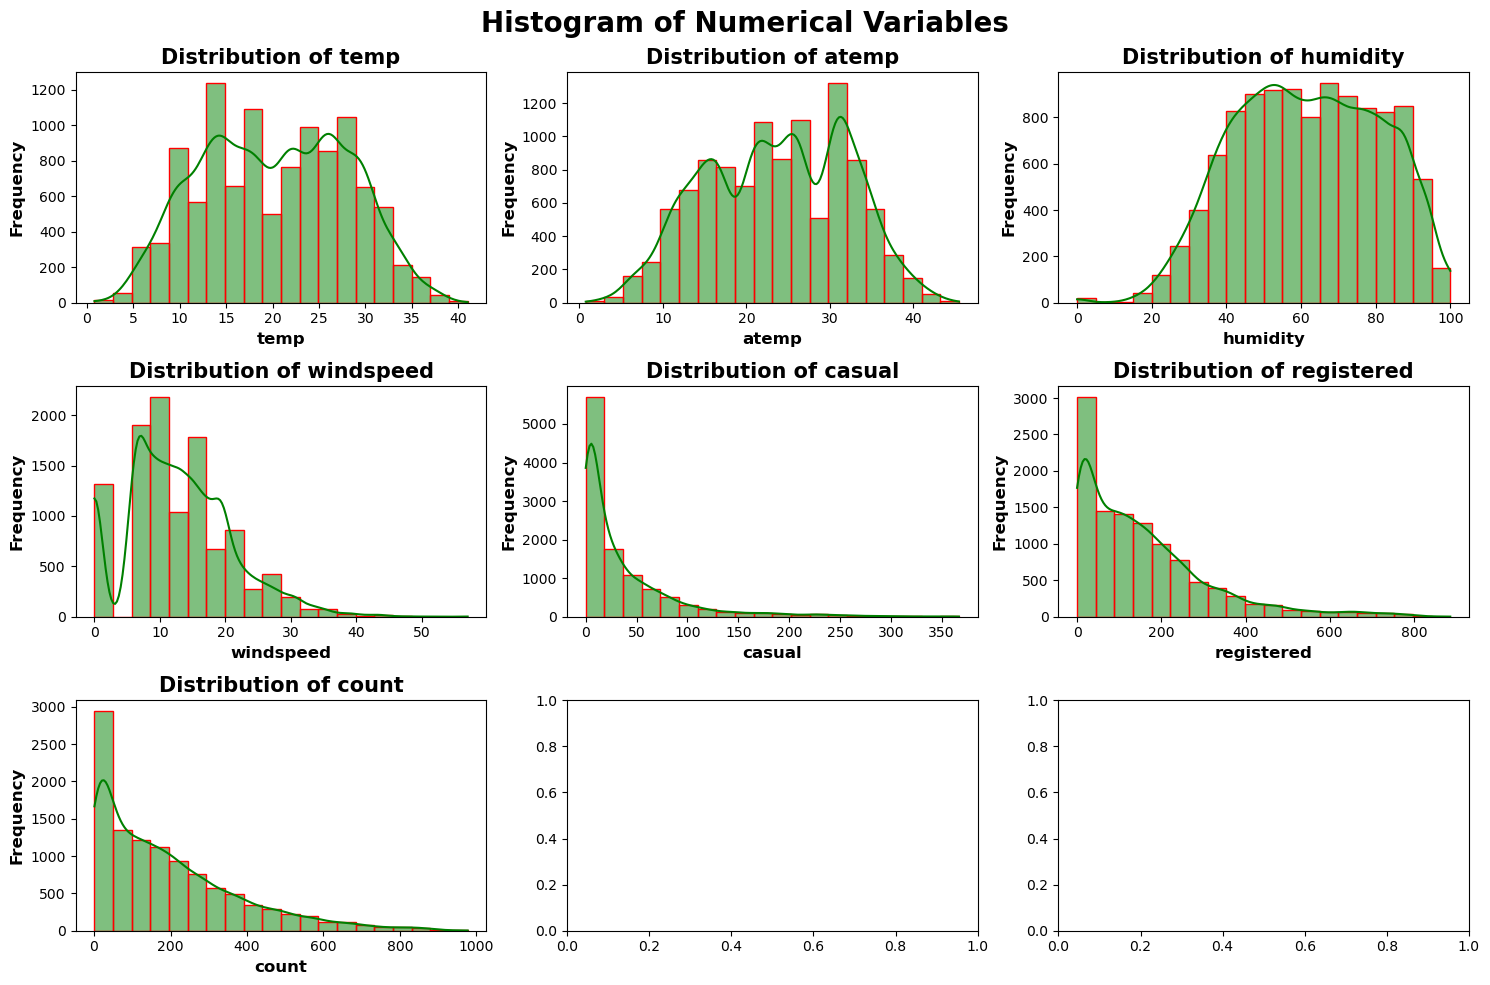

In [51]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axes = plt.subplots(3, 3, figsize = (15,10))
axes = axes.flatten()

for i, cols in enumerate(num_cols):
    sns.histplot(data = yulu_df, x = cols, ax = axes[i], color='green', edgecolor='red', kde=True, fill=True, bins=20)
    axes[i].set_title(f"Distribution of {cols}", fontweight = 'bold', fontsize = 15)
    axes[i].set_ylabel("Frequency", fontweight = 'bold', fontsize = 12)
    axes[i].set_xlabel(f"{cols}", fontweight = 'bold', fontsize = 12)
plt.suptitle('Histogram of Numerical Variables', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

***Insights:***

**1. Gaussian Distrbution:** Columns `temp, atemp` follow gaussian distribution as the data is more concentrated towards center of the data.

**2. Right Skewed:** Columns `windspeed, casual, registered, count` are right-skewed because the majority of the data points are concentrated on the left side of the distribution, with a long tail extending to the right.

**3. Left Skewed:** Column `humidity` is left-skewed because the majority of the data points are concentrated on the right side of the distribution, with a long tail extending to the left.

In [53]:
def outliers(df, col):
    # Calculate Q1 and Q3
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)

    # Calculating IQR
    IQR = Q3 - Q1

    # Calculating upper and lower range
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)

    # detecting outliers
    outliers_df = df[(df[col] > upper) | (df[col] < lower)]

    return outliers_df

In [54]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for cols in num_cols:
    print(f"Total number of outliers in {cols} column: {len(outliers(yulu_df, cols))}", "\n")

Total number of outliers in temp column: 0 

Total number of outliers in atemp column: 0 

Total number of outliers in humidity column: 22 

Total number of outliers in windspeed column: 227 

Total number of outliers in casual column: 749 

Total number of outliers in registered column: 423 

Total number of outliers in count column: 300 



### **3.2 Categorical Columns**

#### **3.2.1 Distribution of Categorical Values**

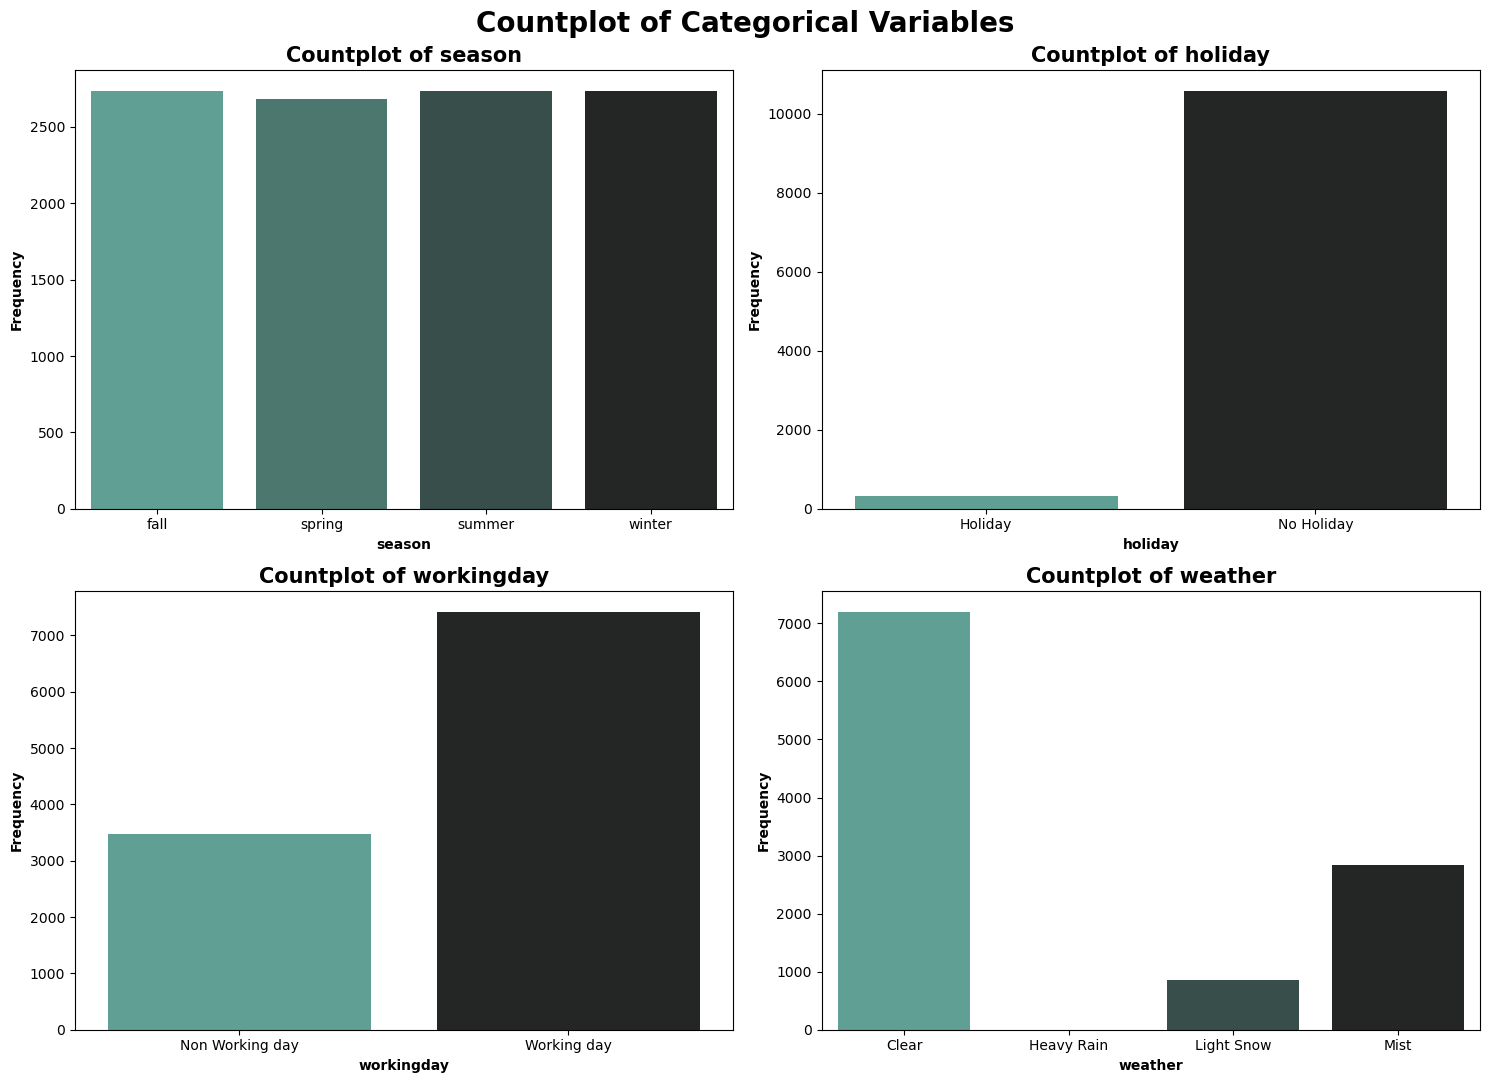

In [57]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(2, 2, figsize = (15, 11))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data = yulu_df, x = col, palette = 'dark:#5A9_r', ax = axes[i])
    axes[i].set_title(f"Countplot of {col}", fontweight = 'bold', fontsize = 15)
    axes[i].set_xlabel(f"{col}", fontweight = 'bold', fontsize = 10)
    axes[i].set_ylabel("Frequency", fontweight = 'bold', fontsize = 10)
plt.suptitle('Countplot of Categorical Variables', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()

***Insights:***

**1. Season:** The above plots tells us thats all the 4 seasons equally occured in the dataset.

**2. Holiday:** The count of holidays is very less.

**3. Working Day:** There were more working data in the data that was recorded.

**4. Weather:** During the time, recorded in this dataset, the weather was mostly clear followed by mist & couldy weather.

#### **3.2.2 Top 10 Rental days**

In [60]:
top_10_days = yulu_df.groupby('date')['count'].sum().reset_index().sort_values(by = 'count', ascending = False).head(10).reset_index().drop(columns=['index'])
top_10_days

,date,count
0,2012-09-15,8714
1,2012-05-19,8294
2,2012-09-09,8227
3,2012-10-05,8156
4,2012-06-02,8120
5,2012-09-14,8009
6,2012-10-06,7965
7,2012-09-12,7870
8,2012-08-18,7865
9,2012-03-17,7836


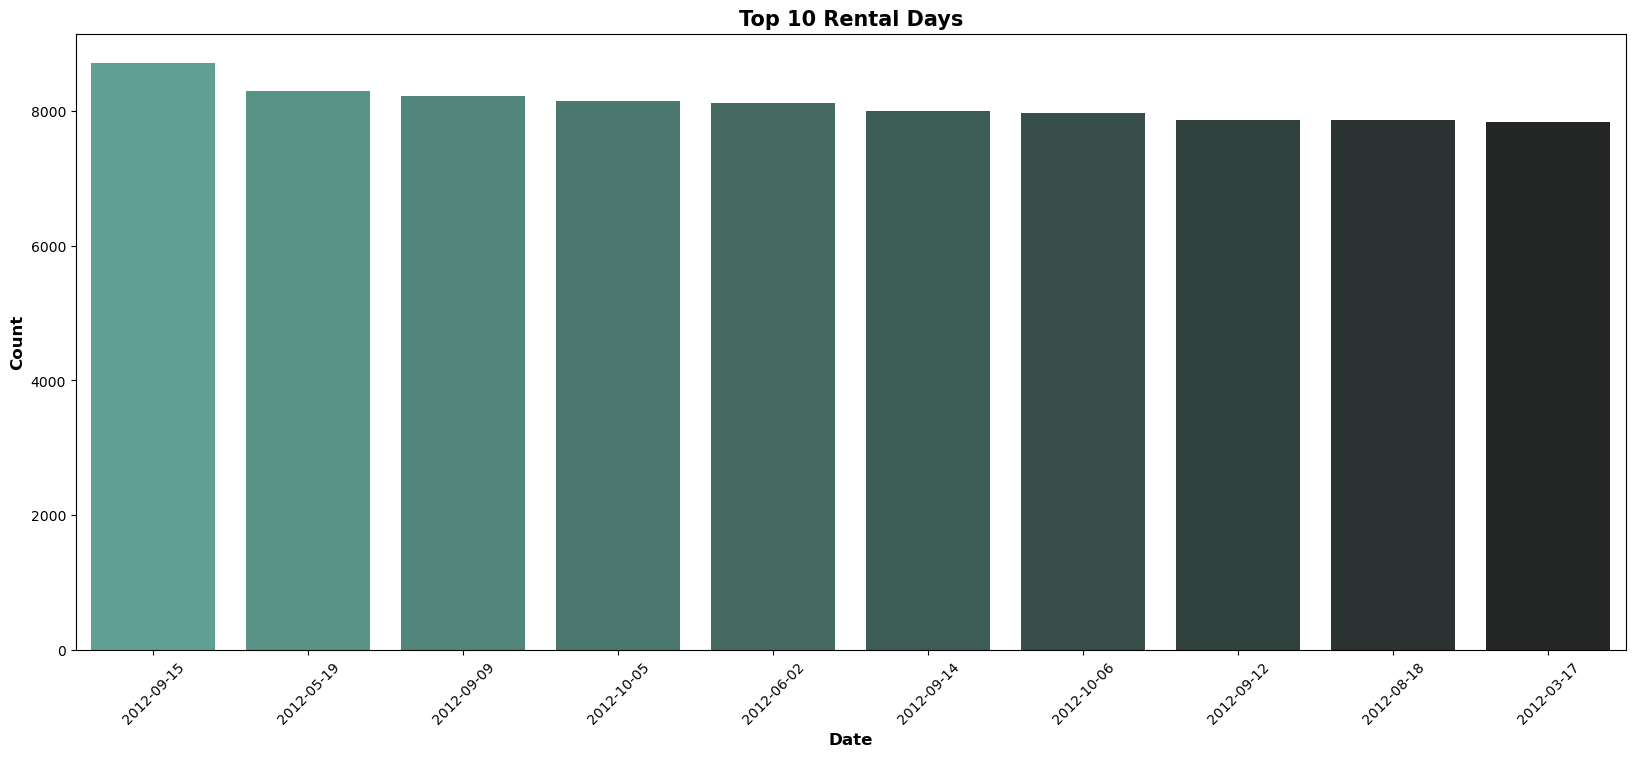

In [61]:
plt.figure(figsize =  (20,8))
sns.barplot(data = top_10_days, x = 'date', y = 'count', palette = 'dark:#5A9_r', saturation=0.75, fill=True)
plt.xlabel('Date', fontweight = 'bold', fontsize = 12)
plt.ylabel('Count', fontweight = 'bold', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Top 10 Rental Days', fontweight = 'bold', fontsize = 15)
plt.show()

***Insights:***

- The most bicycles were rented on `15-09-2012`.
- The difference between the bicycles rented among these top 10 days is very close.

#### **3.2.3 Scatterplot for understanding the period in which bicycles were rented the most and the least** 

In [64]:
total_count = yulu_df.groupby('date')['count'].sum().reset_index().sort_values(by = 'count', ascending = False).reset_index().drop(columns=['index'])
total_count

,date,count
0,2012-09-15,8714
1,2012-05-19,8294
2,2012-09-09,8227
3,2012-10-05,8156
4,2012-06-02,8120
...,...,...
451,2011-04-16,795
452,2011-12-07,705
453,2011-01-18,683
454,2011-03-10,623


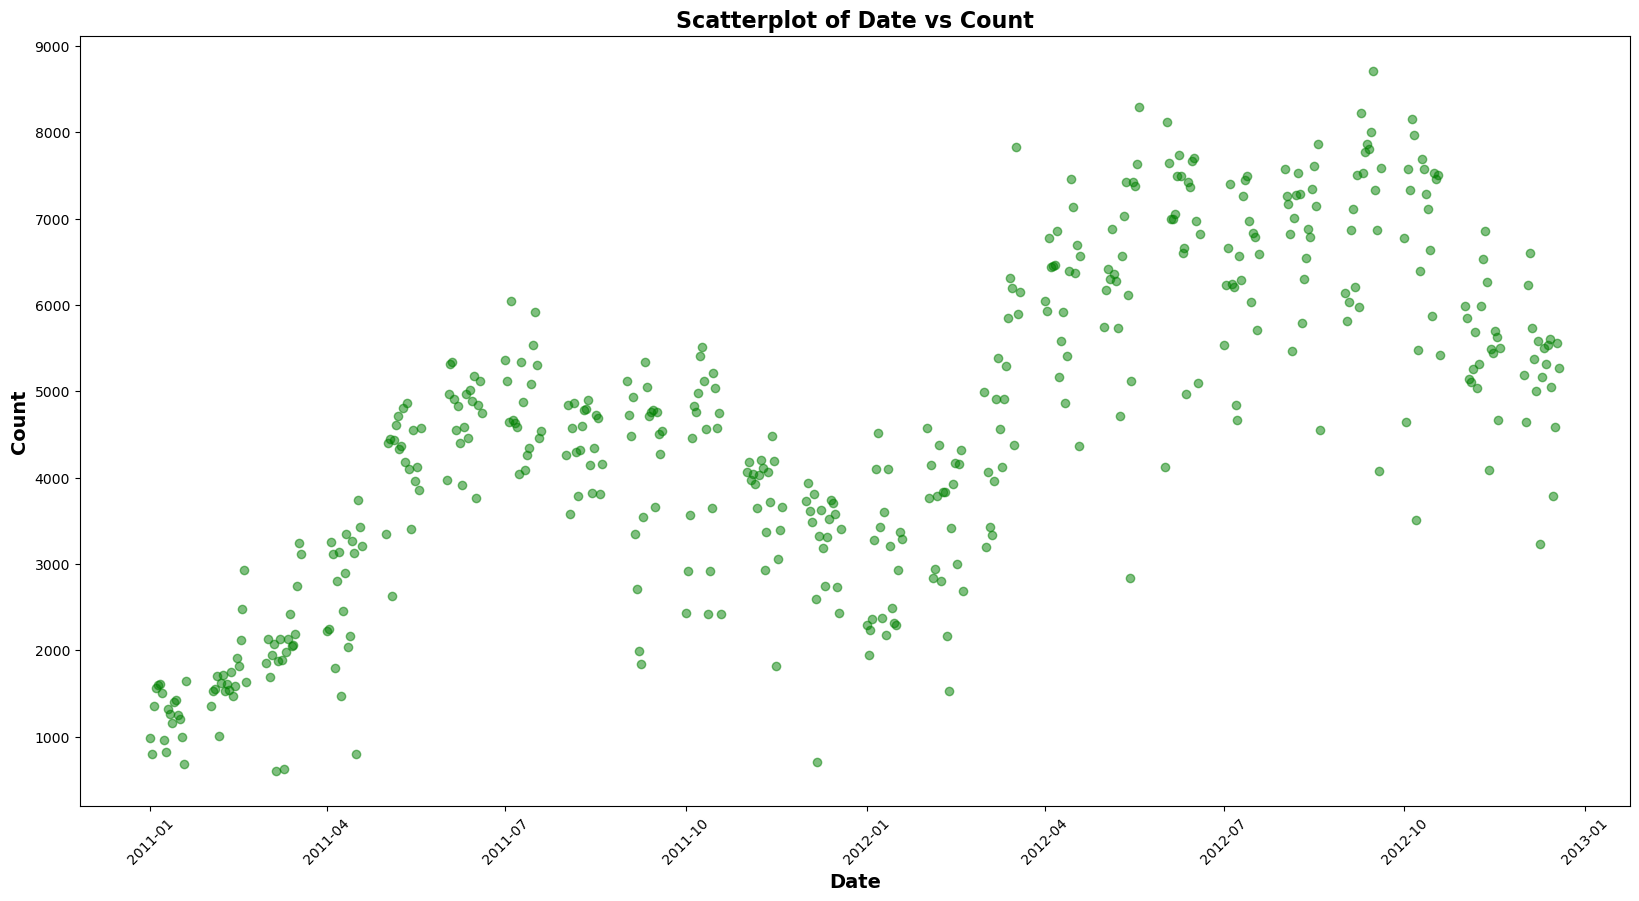

In [65]:
plt.figure(figsize=(20, 10))
plt.scatter(total_count['date'], total_count['count'], alpha = 0.5, color = 'green')
plt.title('Scatterplot of Date vs Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Date', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

***Insights:***

- The above chart tells us that the period in which most bicycles were rented was between `04-2012` and `10-2012`.
- The period where the least bikes were rented was between `01-2011` and `04-2011`. This might be due to less awareness about these bicycle rental. 

# **4. Bi-Variate Analysis**

### **4.1 Exploring Relationships between 'count' column and categorical columns**

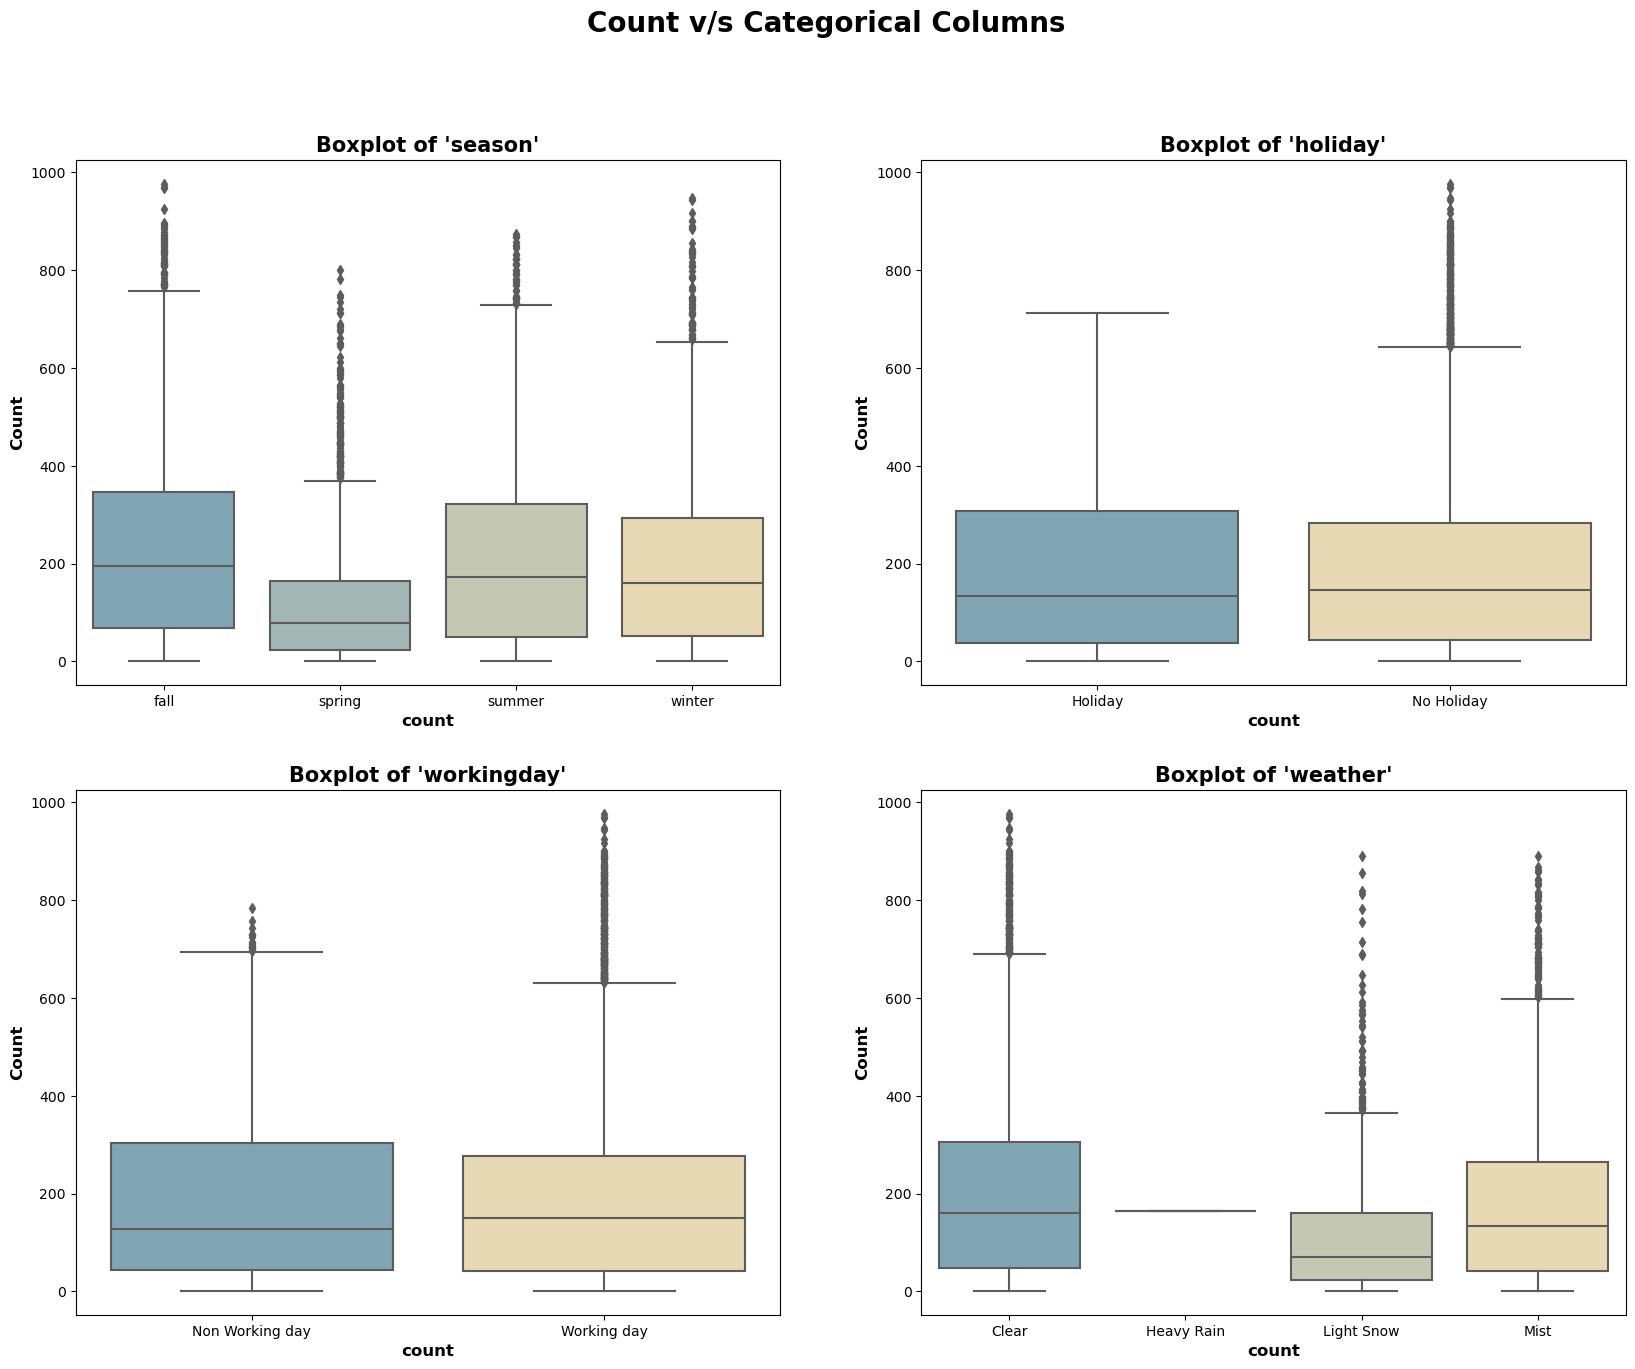

In [69]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(2, 2, figsize = (20, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(data = yulu_df, x = col, y = 'count', ax = axes[i], palette = 'blend:#7AB,#EDA')
    axes[i].set_title(f"Boxplot of '{col}'", fontweight = 'bold', fontsize = 15)
    axes[i].set_xlabel(cols, fontsize = 12, fontweight = 'bold')
    axes[i].set_ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.suptitle('Count v/s Categorical Columns', fontweight = 'bold', fontsize = 20)
plt.tight_layout
plt.show()

# **5. Checking if there is a significant difference between no. of bike rides on Weekdays and Weekends**

### **5.1 Formulating Null and Alternate Hypothesis**

`Ho: There is no significant difference in the number of bike rides between Weekdays and Weekends.`

`Ha: There is a significant difference in the number of bike rides between Weekdays and Weekends.`

In [73]:
# creating a dataframe with only Weekdays
yulu_df_weekdays = yulu_df[yulu_df['workingday'] == 'Working day']['count'].sample(1000)
yulu_df_weekdays

7286     98
7657    255
827      76
6048     98
2553    365
       ... 
5311    280
2266    467
6890    246
5668    499
2705    381
Name: count, Length: 1000, dtype: int64

In [75]:
# creating a dataframe with only Weekdays
yulu_df_weekends = yulu_df[yulu_df['workingday'] == 'Non Working day']['count'].sample(1000)
yulu_df_weekends

9406     73
5355      9
2666     89
9053    149
702     120
       ... 
3709    308
1378     33
2096     11
700     120
1168     44
Name: count, Length: 1000, dtype: int64

### **5.2 Checking Normality of the samples created using Shapiro Wilkins Test and Q-Q plot**


`Ho: Sample appears to be normally disributed.`

`Ha: Sample does not appear to be normally distributed.`

#### **5.2.1 Normality check for Weekday samples**

In [77]:
# Shapiro-Wilkins test

from scipy.stats import shapiro

stat, p = shapiro(yulu_df_weekdays)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Sample does not appear to be normally distributed.")
else:
    print("Sample appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.8753118515014648
p-value: 1.5559570687334979e-27
Sample does not appear to be normally distributed.


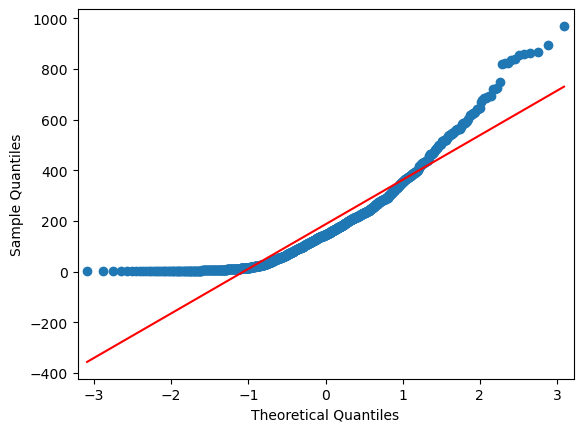

In [79]:
# Q-Q Plot

from statsmodels.graphics.gofplots import qqplot

weekday_count_samples_series = pd.Series(yulu_df_weekdays)

qqplot(weekday_count_samples_series, line= 's')
plt.show()

#### **5.2.2 Normality check for Weekend samples**

In [81]:
# Shapiro-Wilkins test

from scipy.stats import shapiro

stat, p = shapiro(yulu_df_weekends)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Sample does not appear to be normally distributed.")
else:
    print("Sample appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.8804161548614502
p-value: 4.782917979579426e-27
Sample does not appear to be normally distributed.


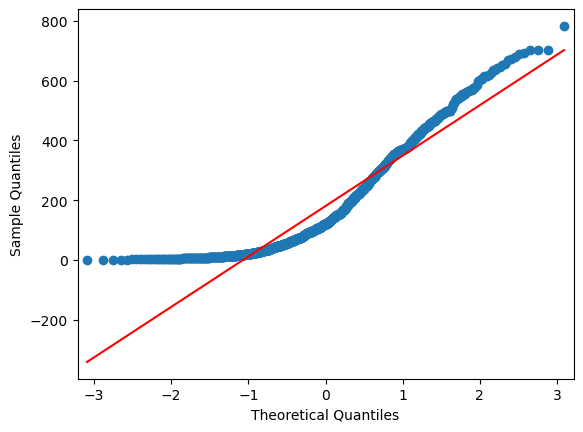

In [85]:
# Q-Q Plot

from statsmodels.graphics.gofplots import qqplot

weekend_count_samples_series = pd.Series(yulu_df_weekends)

qqplot(weekend_count_samples_series, line= 's')
plt.show()

### **5.3 Selecting Appropriate Test**

We will be conducting this test with 2 Sample Independent T Test as both the samples appear to be Normally distributed.

In [89]:
from scipy.stats import ttest_ind

### **5.4 Setting Significance Level**

In [92]:
alpha = 0.05

### **5.5 Calculating Test Statistics and P Value**

In [95]:
t_stat, p_val = ttest_ind(yulu_df_weekdays, yulu_df_weekends, alternative = 'two-sided')
print(f"Test Statistics: {t_stat}")
print(f"P-Value: {p_val}")

Test Statistics: 0.8072461253181086
P-Value: 0.41962078179604545


### **5.6 Deriving Conclusion**

In [98]:
if p_val < alpha:
    print("There is a significant difference in the number of bike rides between Weekdays and Weekends.")
else:
    print("There is no significant difference in the number of bike rides between Weekdays and Weekends.")

There is no significant difference in the number of bike rides between Weekdays and Weekends.


***Insight:***

- From the above conducted test we can confirm that there is no significant difference between the no. of bicycles rides on Weekdays and Weekends.


***Recommendations:***

**1. Weekend Marathon:** To tackle this issue, Yulu should conduct bicycle ride marathons every weekend across cities so that people can engage more with their electric bicycles.

**2. Build partnerships:** Yulu should build partnerships with Office tech parks, different companies and colleges to boost their weekday bicycle rides counts.

**3. Hotspots:** Yulu should conduct a thorough analysis for ensuring that they have installed bike stations at the Hotspot places in the respective cities. This will help boost in weekend as well weekday count of bicycle rides. 

# **6. Checking if the demand of bicycles on rent is the same for different Weather conditions**

### **6.1 Formulating Null and Alternate Hypothesis**

`Ho: There is no significant difference in the demand of bicycles on rent for different Weather conditions.`

`Ha: There is a significant difference in the demand of bicycles on rent for different Weather conditions.`

In [111]:
# creating a dataframe with only Clear weather
yulu_df_clear = yulu_df[yulu_df['weather'] == 'Clear']['count'].sample(840)
yulu_df_clear

6092     16
5749    144
7651     11
6564    297
2557    143
       ... 
6449     31
774      98
7889     89
5565     79
563     182
Name: count, Length: 840, dtype: int64

In [113]:
# creating a dataframe with only Mist weather
yulu_df_mist = yulu_df[yulu_df['weather'] == 'Mist']['count'].sample(840)
yulu_df_mist

5619     88
5761      5
1619     65
151      50
6611    712
       ... 
6532    159
154     187
6198    172
6406     14
6128    243
Name: count, Length: 840, dtype: int64

In [115]:
# creating a dataframe with only Light Snow weather
yulu_df_light_snow = yulu_df[yulu_df['weather'] == 'Light Snow']['count'].sample(840)
yulu_df_light_snow

7567    111
4062     36
3752     86
3285    171
4882     54
       ... 
2119     14
1090     18
4491      3
3753    328
9194     62
Name: count, Length: 840, dtype: int64

In [117]:
# creating a dataframe with only Light Snow weather
yulu_df_heavy_rain = yulu_df[yulu_df['weather'] == 'Heavy Rain']

heavy_rain_count = np.array(len(yulu_df_heavy_rain['count']))

### **6.2 Checking Normality of the samples**


`Ho: Sample appears to be normally disributed.`

`Ha: Sample does not appear to be normally distributed.`

#### **6.2.1 Normality check for Clear weather**

In [119]:
# Shapiro-Wilkins test

stat, p = shapiro(yulu_df_clear)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Sample does not appear to be normally distributed.")
else:
    print("Sample appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.8827691078186035
p-value: 1.1005949705295859e-24
Sample does not appear to be normally distributed.


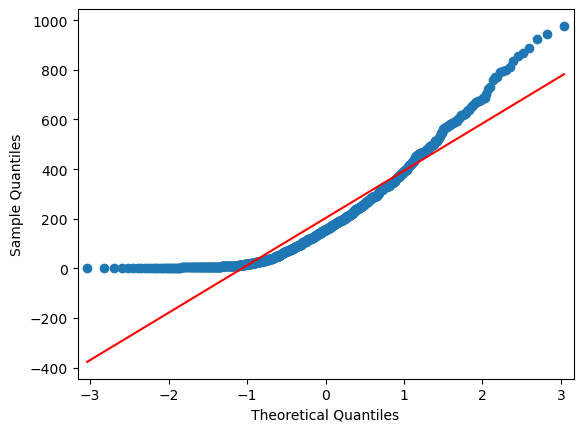

In [121]:
# Q-Q Plot

clear_count_samples_series = pd.Series(yulu_df_clear)

qqplot(clear_count_samples_series, line= 's')
plt.show()

#### **6.2.2 Normality check for Mist weather**

In [123]:
# Shapiro-Wilkins test

stat, p = shapiro(yulu_df_mist)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Sample does not appear to be normally distributed.")
else:
    print("Sample appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.8781239986419678
p-value: 4.1007174012019524e-25
Sample does not appear to be normally distributed.


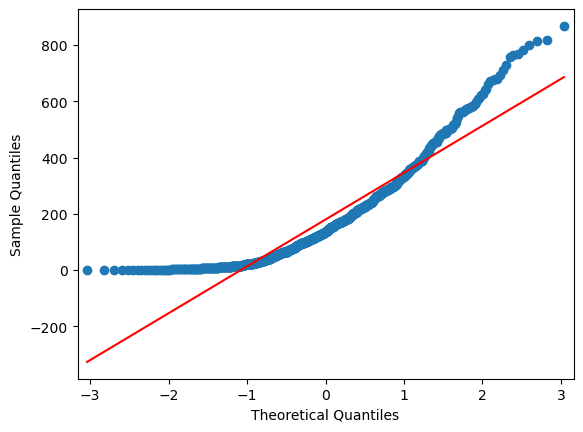

In [125]:
# Q-Q Plot

mist_count_samples_series = pd.Series(yulu_df_mist)

qqplot(mist_count_samples_series, line= 's')
plt.show()

#### **6.2.3 Normality check for Light Snow weather**

In [129]:
# Shapiro-Wilkins test

stat, p = shapiro(yulu_df_light_snow)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Sample does not appear to be normally distributed.")
else:
    print("Sample appears to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.7623763680458069
p-value: 4.281578011764883e-33
Sample does not appear to be normally distributed.


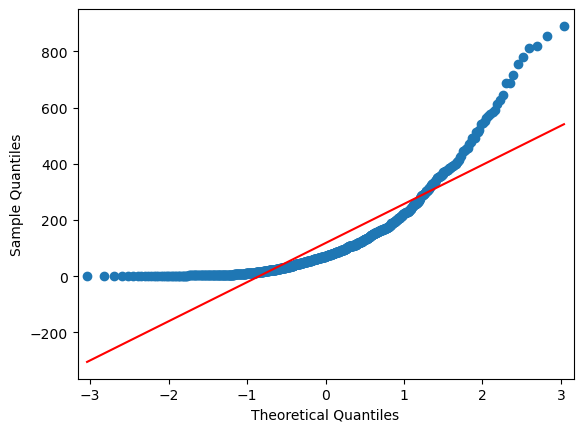

In [127]:
# Q-Q Plot

light_snow_count_samples_series = pd.Series(yulu_df_light_snow)

qqplot(light_snow_count_samples_series, line= 's')
plt.show()

#### **6.2.4 Normality check for Heavy Rain weather**

Since there is only one row with Heavy Rain weather. We will not be performing any checks

### **6.3 Checking Variance**

In [134]:
from scipy.stats import levene

stat, p_val = levene(yulu_df_clear, yulu_df_mist, yulu_df_light_snow)
print(f"Levene Statistics: {stat}")
print(f"P-Value: {p_val}")

alpha = .05
if p_val < alpha:
  print("Variance is differenct across all the groups")
else:
  print("Variance is not different across all the groups")

Levene Statistics: 44.60211098947664
P-Value: 9.223590216500363e-20
Variance is differenct across all the groups


### **6.4 Selecting Apppropriate test**


Since we have more than two categories for `weather` column, we will go with `Anova test`.

In [ ]:
from scipy.stats import f_oneway

### **6.5 Setting Significance Level** 

In [ ]:
alpha = 0.05

### **6.6 Calculating Test Statistics and P Value**

In [ ]:
f_stat, p_val = f_oneway(clear_count_samples, mist_count_samples, light_snow_count_samples)
print(f"F Statistics: {f_stat}")
print(f"P-Value: {(p_val)}")

### **6.7 Deriving Conclusion**

In [ ]:
if p_val < alpha:
    print('The demand for bicycles is different for at least one weather condition compared to the others.')
else:
    print('The demand for bicycles is the same across all weather conditions.')

***Insights:***

- According to the test we conducted, we can conclude that the demand for bicycles is different for at least one weather condition compared to the others.

***Recommendations:***

**1. Availablity of bicycles:** Yulu should ensure that bicycles are being made available to the customers in all weather conditions.

**2. Protection Equipment:** As we can see that the count of riders in `Mist`, `Heavy Rain` and `Light Snow` is quite less, Yulu can protective equipment (like raincoat, protective glasses and helmets) in these weather conditions to the riders so that they can have a safe ride.

**3. Inventory Management:** For the weather conditions where the count of bike rental is less, Yulu can reduce bicycle availability to minimize operational costs.

# **7. Checking if the Weather conditions are significantly different during different Seasons**

### **7.1 Formulating Bull and Alternative Hypothesis**

`Ho: There is no significant difference in the weather conditions during different seasons.`

`Ha: There is a significant difference in the weather conditions during different seasons.`

### **7.2 Selecting Approporiate Test**

Since we are going to deal with two categorical columns in this test, we will conduct `Chi Square Test`.

In [ ]:
from scipy.stats import chi2_contingency

### **7.3 Creating a Contingency Table**

In [ ]:
contingency_table = pd.crosstab(yulu_df['season'], yulu_df['weather'])
contingency_table

### **7.4 Setting Significance Level**

In [ ]:
alpha = 0.05

### **7.5 Calculation Test Statistics and P Value**

In [ ]:
chi_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi Statistics: {chi_stat}")
print(f"P Value: {p_val}")

### **7.6 Deriving Conclusions**

In [ ]:
if p_val < alpha:
    print('There is a significant difference in the weather conditions during different seasons.')
else:
    print('There is no significant difference in the weather conditions during different seasons.')

***Insights:***

- From the test we conducted, we can conclude that there is a significant difference in the weather conditions during different seasons.

***Recommendations:***

**1. Promotional Campaigns:** Since certain seasons have more unfavorable weather, this can help in adjusting bicycle availability, promotional offers, or maintenance schedules.

**2. Protective Gear:** If `Heavy Rain` conditions dominate during a specific season, extra resources (like protective gear for bicycles) might be allocated.